In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-1.298258,0.098587,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-1.063762,0.242001,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-0.650672,0.376269,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-0.110089,0.461174,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,0.454509,0.468217,13.734955,2.621609,0.178917


# SVM para regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00257957 -0.00284336 -0.00275056 -0.00266915 -0.00294458 -0.00268719
 -0.0027545  -0.00248004 -0.00279742 -0.00280353] 

O erro quadrático médio foi: 0.002655
O erro quadrático total foi: 3.091401
O maior erro por previsão foi: 0.251451
O erro relativo foi 22.564729%

Error for the time series sample:
O erro quadrático médio foi: 0.007443
O erro quadrático total foi: 2.241488
O maior erro por previsão foi: 0.477049
O erro relativo foi 29.484067%


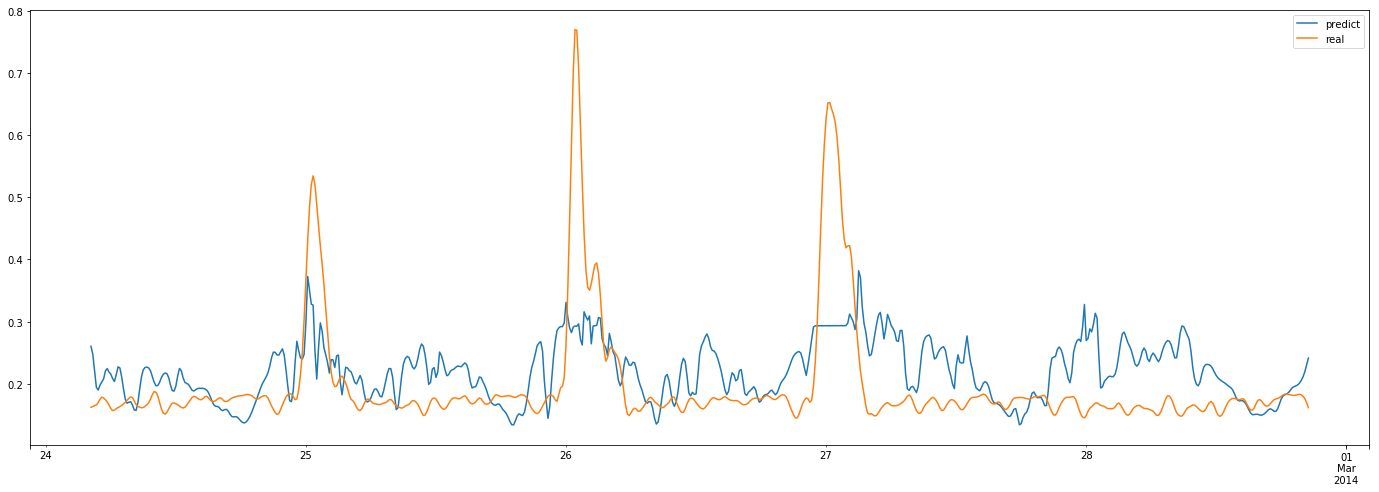

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00334598 -0.00308382 -0.00297068 -0.00339575 -0.00337032 -0.00321954
 -0.00333522 -0.00292792 -0.003406   -0.00334289] 

O erro quadrático médio foi: 0.003202
O erro quadrático total foi: 3.395007
O maior erro por previsão foi: 0.277333
O erro relativo foi 26.549929%

Error for the time series sample:
O erro quadrático médio foi: 0.008836
O erro quadrático total foi: 2.442182
O maior erro por previsão foi: 0.469217
O erro relativo foi 39.397894%


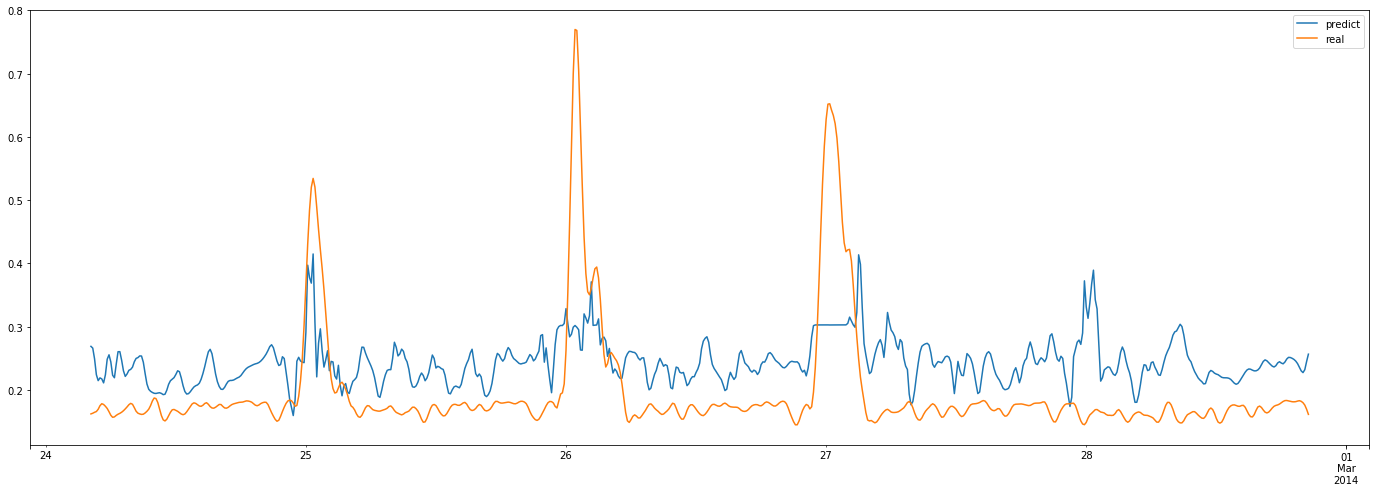

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00266414 -0.00294562 -0.00307055 -0.0029474  -0.00329661 -0.0029635
 -0.00300262 -0.0027262  -0.00276396 -0.00290896] 

O erro quadrático médio foi: 0.002898
O erro quadrático total foi: 3.229910
O maior erro por previsão foi: 0.304296
O erro relativo foi 23.997565%

Error for the time series sample:
O erro quadrático médio foi: 0.008259
O erro quadrático total foi: 2.361061
O maior erro por previsão foi: 0.482774
O erro relativo foi 32.433894%


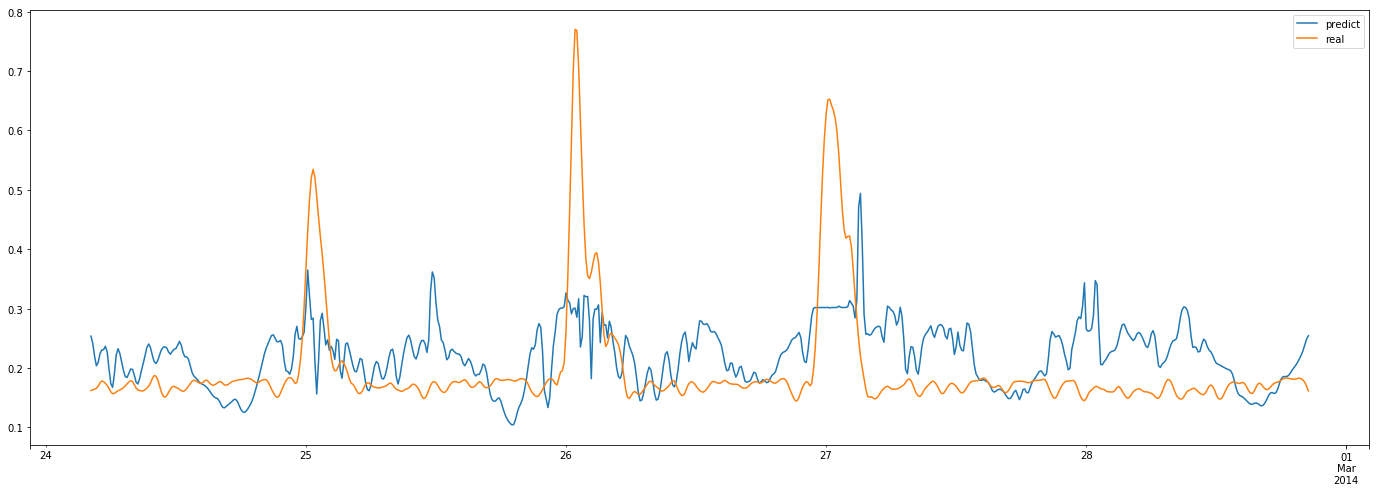

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00235176 -0.00244808 -0.00239397 -0.00245492 -0.00249848 -0.00243141
 -0.00250821 -0.00221819 -0.00274025 -0.00244157] 

O erro quadrático médio foi: 0.002347
O erro quadrático total foi: 2.907051
O maior erro por previsão foi: 0.278631
O erro relativo foi 20.505135%

Error for the time series sample:
O erro quadrático médio foi: 0.007857
O erro quadrático total foi: 2.302917
O maior erro por previsão foi: 0.492167
O erro relativo foi 28.962809%


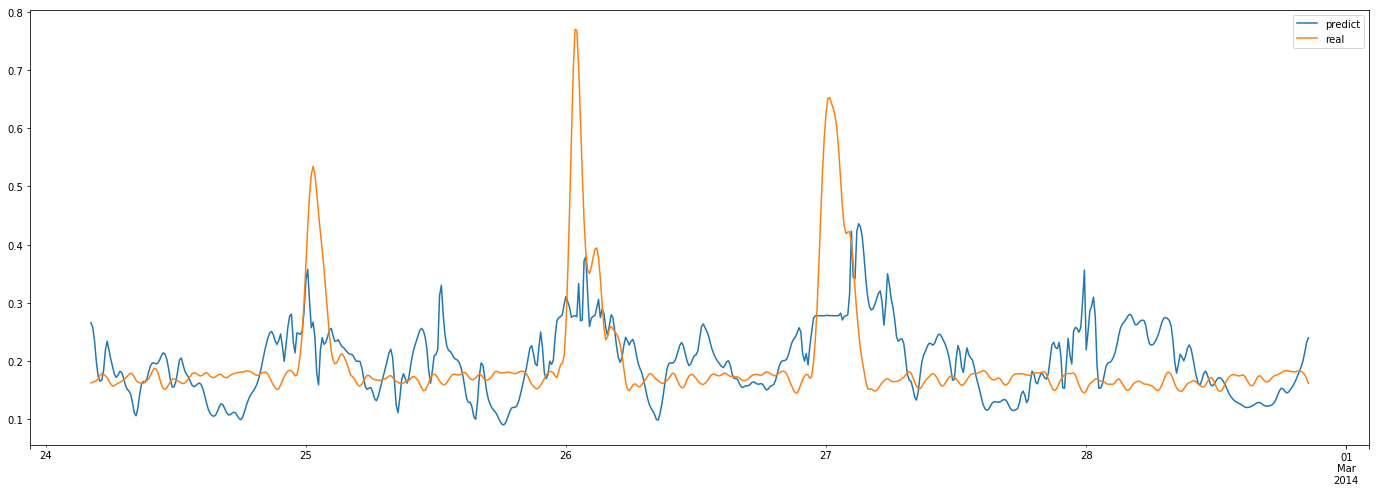

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.0031328  -0.003052   -0.00303903 -0.00306929 -0.00312373 -0.00319356
 -0.00304251 -0.00269003 -0.00308809 -0.00284262] 

O erro quadrático médio foi: 0.002960
O erro quadrático total foi: 3.264509
O maior erro por previsão foi: 0.306418
O erro relativo foi 23.968611%

Error for the time series sample:
O erro quadrático médio foi: 0.008458
O erro quadrático total foi: 2.389377
O maior erro por previsão foi: 0.483363
O erro relativo foi 32.400451%


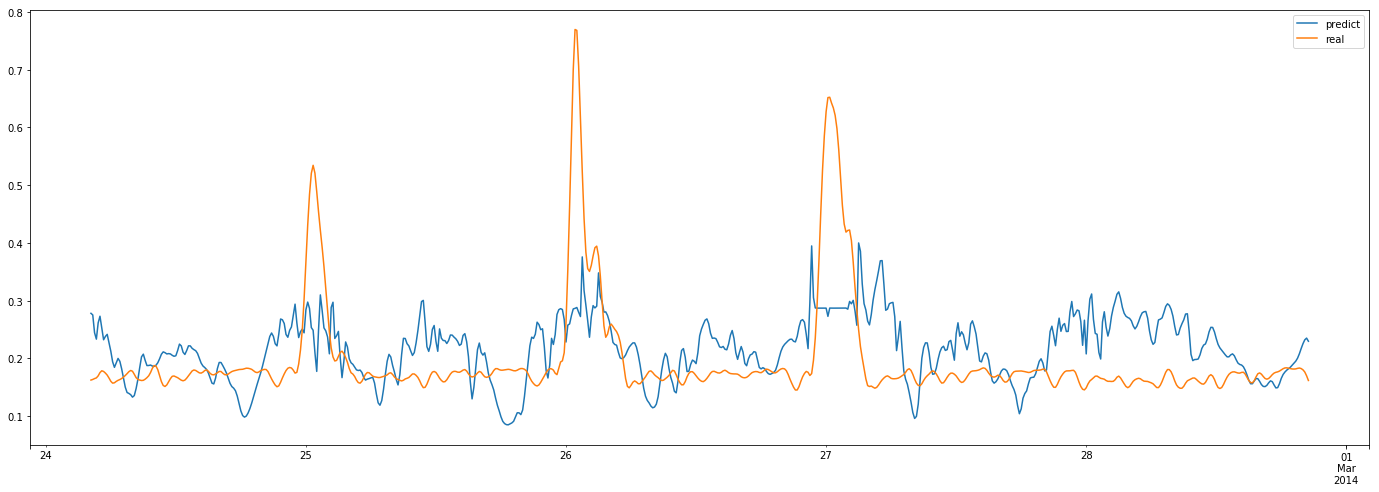

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00277904 -0.00297231 -0.00275683 -0.00301069 -0.00282855 -0.00298818
 -0.00295017 -0.00264515 -0.00287536 -0.00292258] 

O erro quadrático médio foi: 0.002751
O erro quadrático total foi: 3.147104
O maior erro por previsão foi: 0.298669
O erro relativo foi 23.660997%

Error for the time series sample:
O erro quadrático médio foi: 0.008054
O erro quadrático total foi: 2.331617
O maior erro por previsão foi: 0.542955
O erro relativo foi 29.809168%


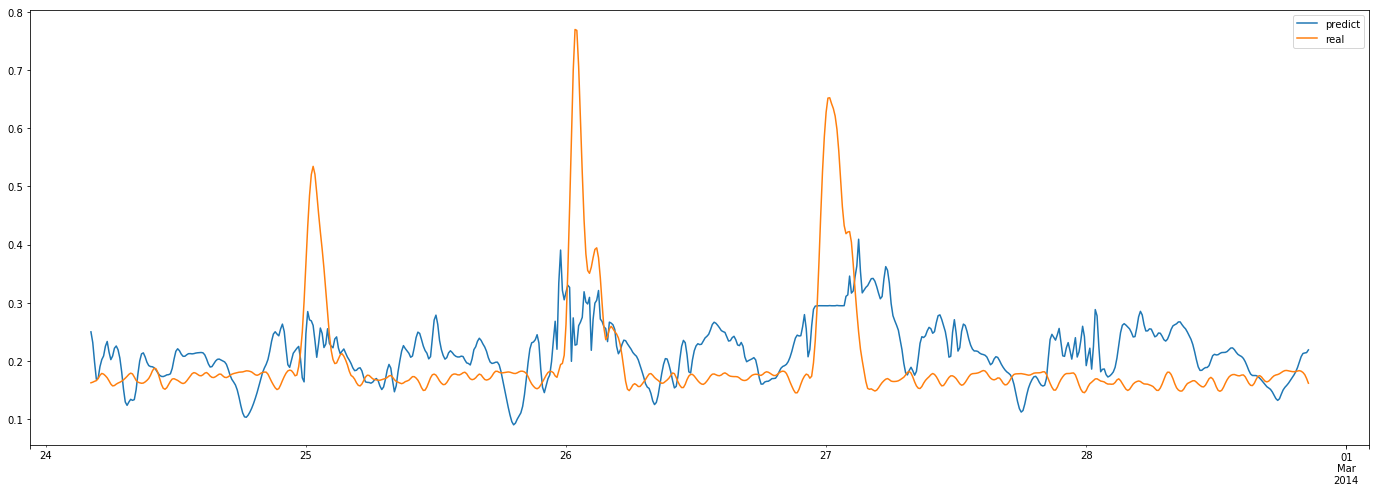

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00330287 -0.00319524 -0.00275623 -0.00318813 -0.00349547 -0.0035402
 -0.0031367  -0.00292089 -0.0032769  -0.00319074] 

O erro quadrático médio foi: 0.003055
O erro quadrático total foi: 3.316056
O maior erro por previsão foi: 0.312665
O erro relativo foi 24.722908%

Error for the time series sample:
O erro quadrático médio foi: 0.008112
O erro quadrático total foi: 2.339975
O maior erro por previsão foi: 0.477919
O erro relativo foi 33.945695%


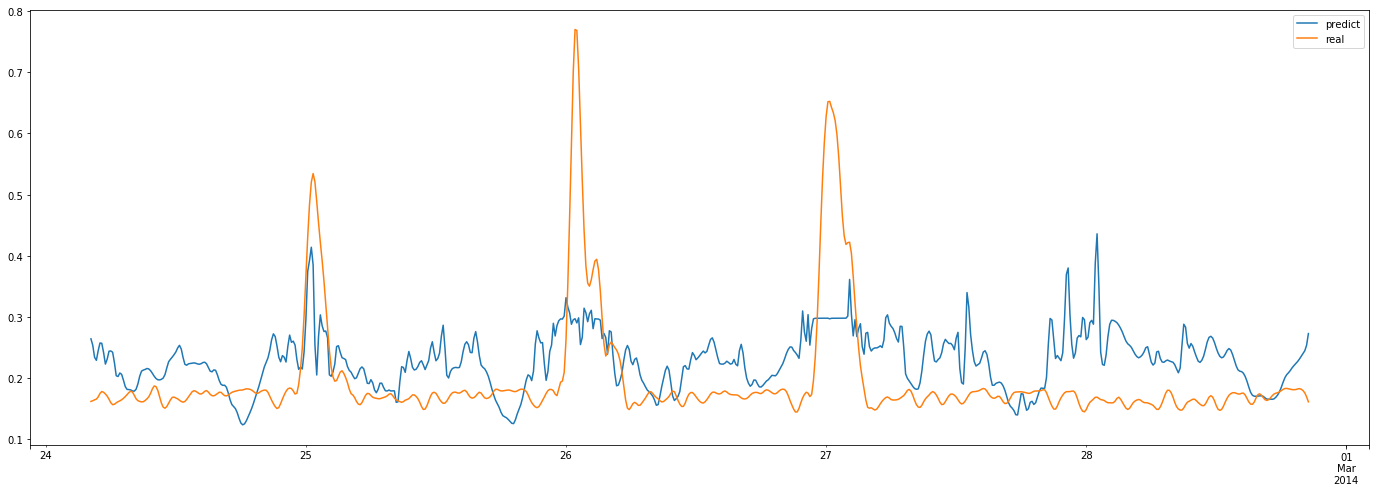

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00239237 -0.00259253 -0.00245323 -0.00262005 -0.00252954 -0.00264722
 -0.00263578 -0.00228693 -0.00279253 -0.0025698 ] 

O erro quadrático médio foi: 0.002462
O erro quadrático total foi: 2.976927
O maior erro por previsão foi: 0.245505
O erro relativo foi 21.415775%

Error for the time series sample:
O erro quadrático médio foi: 0.007091
O erro quadrático total foi: 2.187791
O maior erro por previsão foi: 0.488283
O erro relativo foi 27.465480%


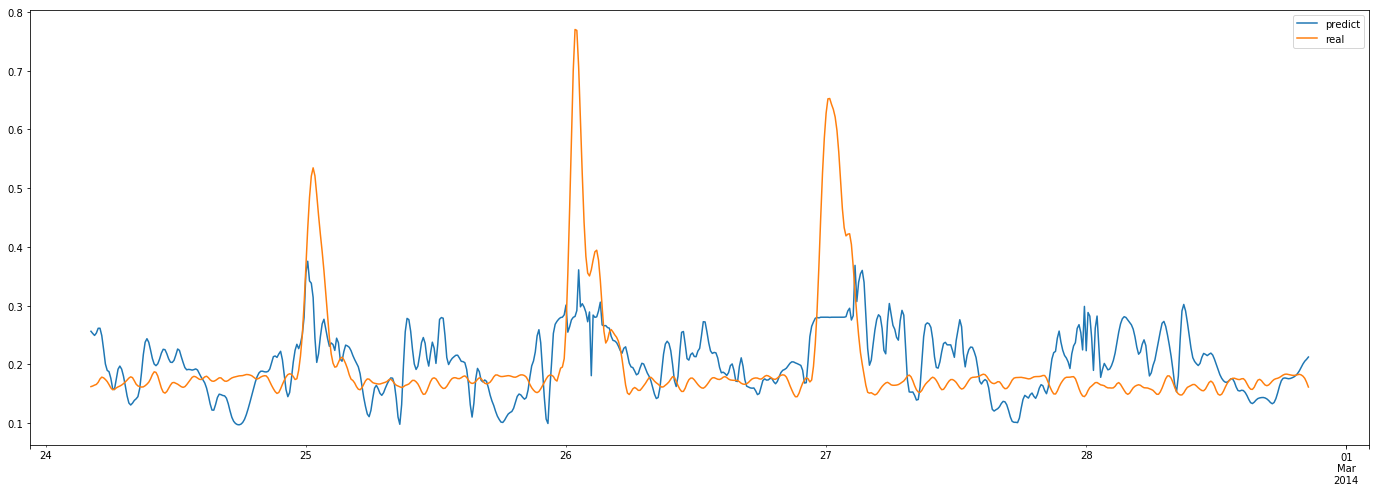

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));